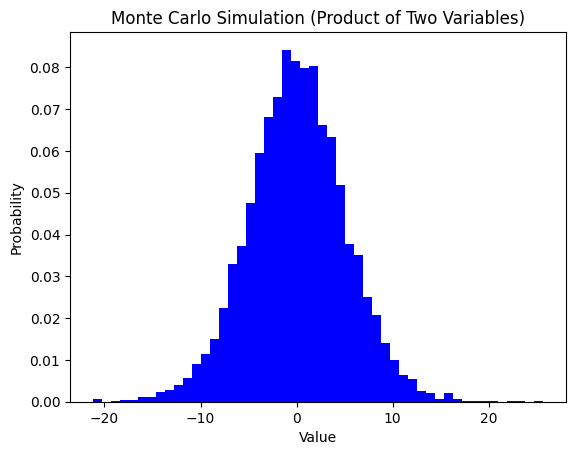

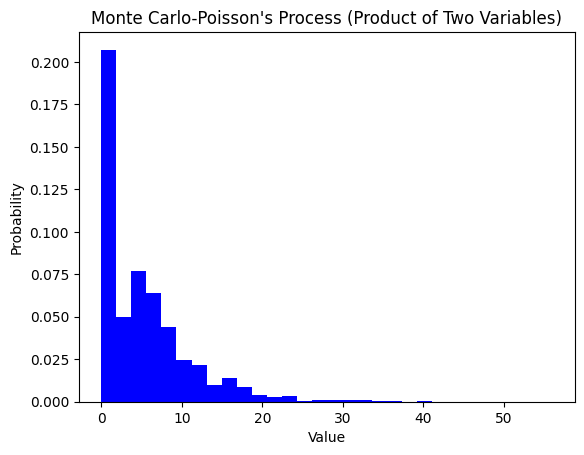

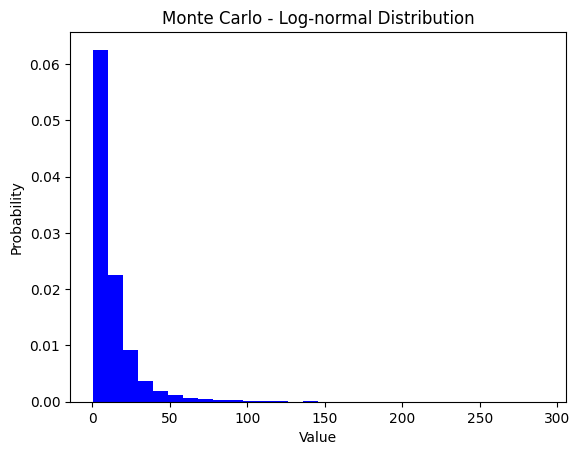

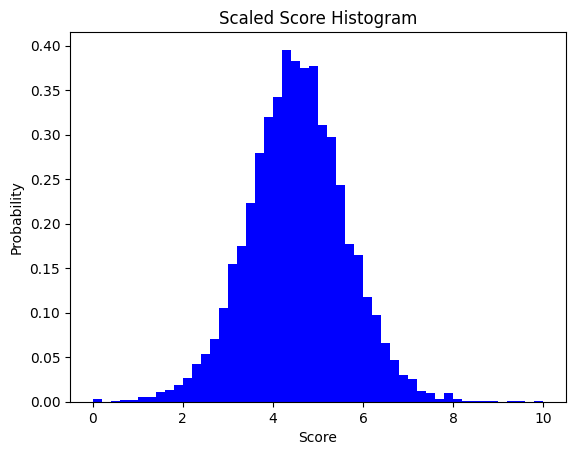

Calculated Insurance Premium: 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed value for reproducibility
seed_value = 50
np.random.seed(seed_value)

# Number of simulations
num_simulations = 10000

# Stochastic variable 1: Normal distribution with mean 0 and standard deviation 1
def stochastic_variable_1():
    return np.random.normal(0, 1)

# Stochastic variable 2: Normal distribution with mean 5 and standard deviation 1
def stochastic_variable_2():
    return np.random.normal(5, 1)

# Perform Monte Carlo simulations for both variables
results_1 = [stochastic_variable_1() for i in range(num_simulations)]
results_2 = [stochastic_variable_2() for i in range(num_simulations)]

# Histogram to visualize the product of two stochastic variables
plt.hist([x * y for x, y in zip(results_1, results_2)], bins=50, density=True, color='b')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Monte Carlo Simulation (Product of Two Variables)')
plt.show()

# Generate random numbers using Poisson distribution
def stochastic_variable1_poisson():
    lam = 5  # Lambda parameter for the Poisson distribution
    return np.random.poisson(lam)

def stochastic_variable2_poisson():
    lam = 1  # Lambda parameter for the Poisson distribution
    return np.random.poisson(lam)

# Perform Monte Carlo simulations and store the results
results1_poisson = [stochastic_variable1_poisson() for i in range(num_simulations)]
results2_poisson = [stochastic_variable2_poisson() for i in range(num_simulations)]

# Histogram to visualize the product of Poisson variables
plt.hist([x * y for x, y in zip(results1_poisson, results2_poisson)], bins=30, density=True, color='b')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title("Monte Carlo-Poisson's Process (Product of Two Variables)")
plt.show()

# Generate random numbers using a log-normal distribution
def stochastic_variable_lognormal():
    mu = 2      # Adjusted mean of the log-normal distribution
    sigma = 1   # Adjusted standard deviation of the log-normal distribution
    return np.random.lognormal(mean=mu, sigma=sigma)

# Perform Monte Carlo simulations and store the results for log-normal distribution
results_lognormal = [stochastic_variable_lognormal() for i in range(num_simulations)]

# Create a histogram to visualize the results of the log-normal distribution
plt.hist(results_lognormal, bins=30, density=True, color='b')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title("Monte Carlo - Log-normal Distribution")
plt.show()

# Scaling function
def scale(x, xy):
    f_max, f_min = 10, 0
    v_min, v_max = min(xy), max(xy)
    return f_min + ((x - v_min) / (v_max - v_min)) * (f_max - f_min)

# Perform scaling
xy = [x * y for x, y in zip(results_1, results_2)]
score = [scale(i, xy) for i in xy]

# Histogram for scaled score
plt.hist(score, bins=50, density=True, color='b')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title("Scaled Score Histogram")
plt.show()

# Risk calculation
bins = np.linspace(min(score), max(score), 50)
hist, _ = np.histogram(score, bins=bins)
risk = {key: value / num_simulations for key, value in zip(bins[:-1], hist)}

# Function to calculate insurance premium based on vulnerabilities
def calculate_insurance_premium(score, IDV):
    expense_ratio = 7 / 100
    lapse_factor = 2 / 100
    rating_factor = -20 / 100

    # Base premium based on risk score
    bp = risk.get(score, 0) * IDV

    # Loading premium considering factors
    lp = (bp * (1 - rating_factor) * (1 + expense_ratio)) / (1 - lapse_factor)
    return lp

# Example of calculating insurance premium
premium = calculate_insurance_premium(5, 100000)
print(f"Calculated Insurance Premium: {premium}")


     threat  vulnerability  risk_score
0  0.117559       0.193892    0.106700
1 -0.760430       0.801809   -0.298984
2  0.814142       0.804724    0.771696
3 -1.255698      -0.369284   -1.005172
4  0.677270       1.362551    0.788174


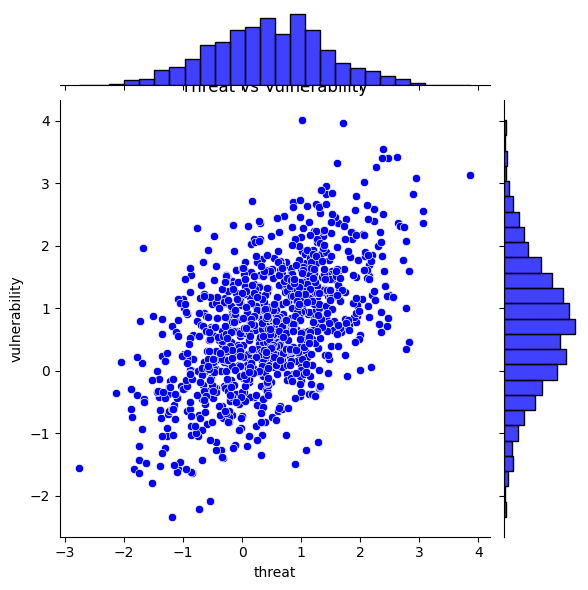

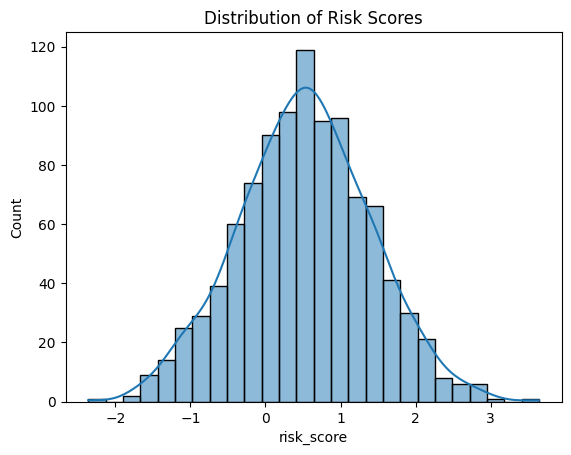

Model Accuracy (R^2): 98.76%


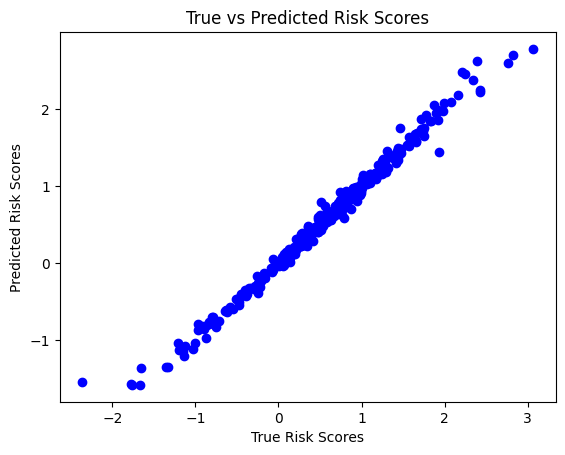

       threat  vulnerability  true_risk_score  predicted_risk_score  \
521 -0.447580      -0.282023        -0.248650             -0.382189   
737  0.912115       1.691954         1.163183              1.133688   
740  0.020619      -0.112854         0.001320             -0.043492   
660  0.212445       0.886217         0.355797              0.481237   
411 -1.393931      -1.518463        -1.354394             -1.346581   

          premium  
521   6178.109823  
737  21336.880752  
740   9565.075468  
660  14812.367036  
411  -3465.814906  


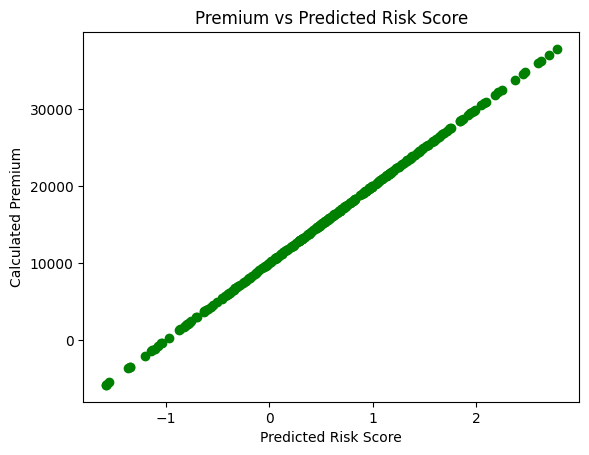

Claim Payout: $87875.00


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

# Define the correlation matrix (correlated variables for threat and vulnerability)
corr_matrix = [[1, 0.6],  # Correlation between threat and vulnerability (e.g., 0.6)
               [0.6, 1]]

# Mean values for the two variables
mean = [0.5, 0.7]  # e.g., average threat at 0.5 and vulnerability at 0.7 (on a scale from 0 to 1)

# Number of simulations (data points)
num_simulations = 1000

# Generate random samples for threat and vulnerability based on the mean and correlation matrix
simulated_data = multivariate_normal(mean=mean, cov=corr_matrix).rvs(num_simulations)

# Split into threat and vulnerability variables
threat = simulated_data[:, 0]
vulnerability = simulated_data[:, 1]

# Create a DataFrame for easier manipulation
data = pd.DataFrame({'threat': threat, 'vulnerability': vulnerability})

# Calculate a synthetic risk score based on threat and vulnerability (weighted sum)
# Risk score formula: risk = 0.7 * threat + 0.3 * vulnerability + some random noise
data['risk_score'] = 0.7 * data['threat'] + 0.3 * data['vulnerability'] + np.random.normal(0, 0.05, num_simulations)

# Display the first few rows of the simulated data
print(data.head())



# Plot the threat and vulnerability distributions
sns.jointplot(x='threat', y='vulnerability', data=data, kind='scatter', color='blue')
plt.title('Threat vs Vulnerability')
plt.show()

# Histogram of the risk scores
sns.histplot(data['risk_score'], kde=True)
plt.title('Distribution of Risk Scores')
plt.show()


# Define the features (threat and vulnerability) and target variable (risk_score)
X = data[['threat', 'vulnerability']]
y = data['risk_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = rf_model.score(X_test, y_test)
print(f"Model Accuracy (R^2): {accuracy * 100:.2f}%")

# Plot the true vs predicted risk scores
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('True Risk Scores')
plt.ylabel('Predicted Risk Scores')
plt.title('True vs Predicted Risk Scores')
plt.show()


# Function to calculate insurance premium based on risk score
def calculate_premium(risk_score):
    """Calculate the insurance premium based on the risk score."""
    base_premium = 10000  # Base premium value
    return base_premium * (1 + risk_score)  # Premium adjusted by risk score

# Calculate the premium for each client in the test set
data_test = X_test.copy()
data_test['true_risk_score'] = y_test
data_test['predicted_risk_score'] = y_pred
data_test['premium'] = data_test['predicted_risk_score'].apply(calculate_premium)

# Display the first few rows of the test data with calculated premiums
print(data_test.head())

# Visualize the relationship between risk scores and premiums
plt.scatter(data_test['predicted_risk_score'], data_test['premium'], color='green')
plt.xlabel('Predicted Risk Score')
plt.ylabel('Calculated Premium')
plt.title('Premium vs Predicted Risk Score')
plt.show()


# Function to process claims based on policy terms and risk score
def process_claim(claim_amount, policy_coverage, deductible, risk_score):
    """Calculate the payout based on claim amount, policy coverage, deductible, and risk score."""
    # Ensure the claim amount does not exceed policy coverage
    if claim_amount > policy_coverage:
        print("Claim exceeds policy coverage. Adjusting to maximum coverage.")
        claim_amount = policy_coverage

    # Calculate payout after the deductible
    payout = claim_amount - deductible

    # Adjust payout based on risk score (higher risk -> reduced payout)
    payout *= (1 - risk_score * 0.1)

    return max(payout, 0)  # Ensure payout is non-negative

# Example claims processing
claim_amount = 100000  # Claim amount
policy_coverage = 150000  # Coverage amount
deductible = 5000  # Deductible
risk_score_example = 0.75  # Example risk score

# Process the claim
payout = process_claim(claim_amount, policy_coverage, deductible, risk_score_example)
print(f"Claim Payout: ${payout:.2f}")


In [ ]:
import numpy as np

# Define factors for the risk assessment
risk_factors = {
    'data_breach': {'likelihood': 0.25, 'impact': 50000},
    'ransomware': {'likelihood': 0.15, 'impact': 100000},
    'phishing': {'likelihood': 0.30, 'impact': 20000},
}

# Function to calculate risk score
def calculate_risk_score(risk_factors):
    total_risk_score = 0
    for risk, values in risk_factors.items():
        likelihood = values['likelihood']
        impact = values['impact']
        # Risk score is likelihood multiplied by the impact
        risk_score = likelihood * impact
        total_risk_score += risk_score
    return total_risk_score

# Function to calculate insurance premium
def calculate_premium(base_rate, risk_score):
    return base_rate * risk_score

# Example usage
base_rate = 0.02  # 2% of the risk score
risk_score = calculate_risk_score(risk_factors)
premium = calculate_premium(base_rate, risk_score)

print(f"Total Risk Score: {risk_score}")
print(f"Insurance Premium: ${premium}")


Total Risk Score: 33500.0
Insurance Premium: $670.0


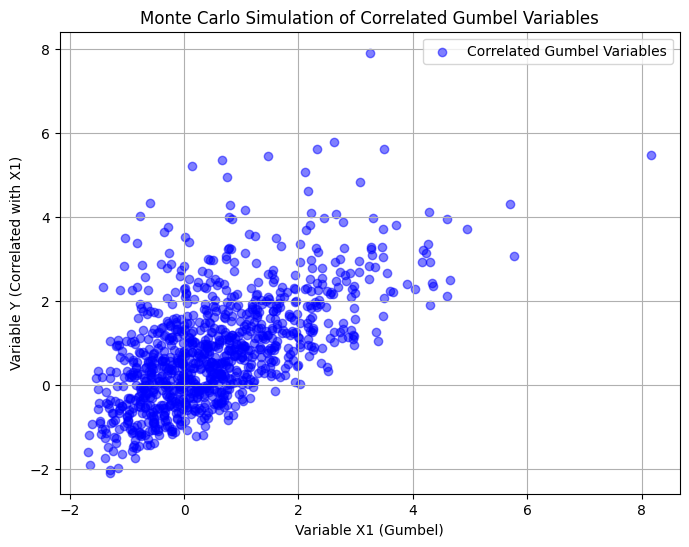

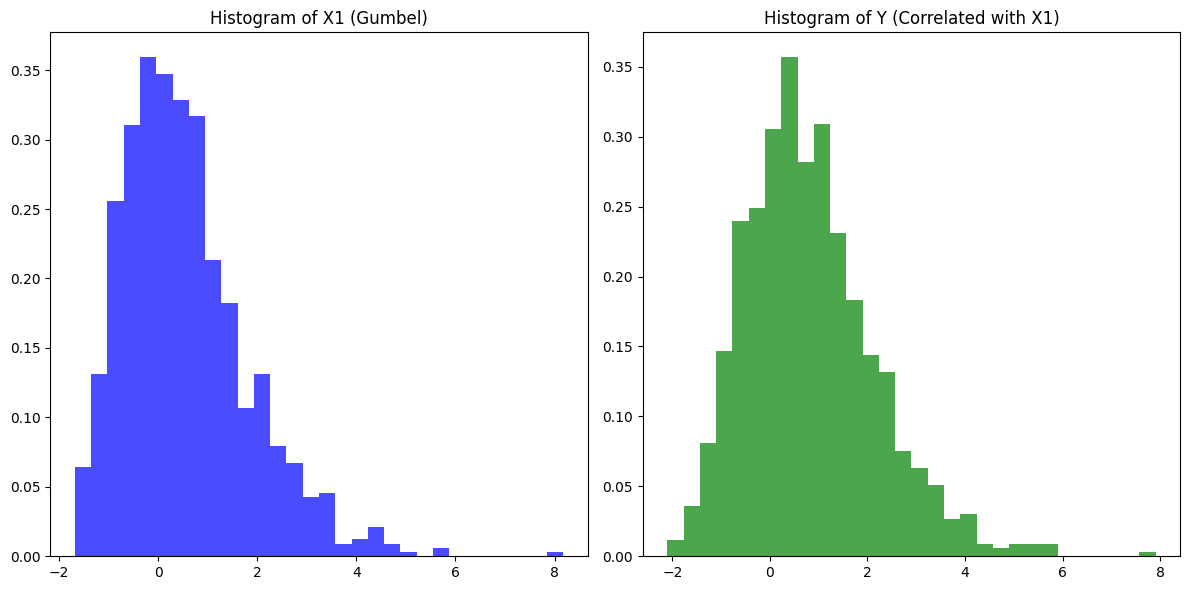

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for Gumbel distribution
loc1, scale1 = 0, 1  # Location and scale for the first variable
loc2, scale2 = 0, 1  # Location and scale for the second variable

# Number of Monte Carlo simulations
num_simulations = 1000

# Generate Gumbel-distributed random variables
X1 = gumbel_r.rvs(loc=loc1, scale=scale1, size=num_simulations)
X2 = gumbel_r.rvs(loc=loc2, scale=scale2, size=num_simulations)

# Introduce correlation between the variables (e.g., via a linear combination)
# Correlation factor (e.g., 0.6)
correlation = 0.6

# Apply correlation to X2 by mixing it with X1
Y = correlation * X1 + np.sqrt(1 - correlation**2) * X2

# Create a scatter plot of the two correlated variables
plt.figure(figsize=(8, 6))
plt.scatter(X1, Y, alpha=0.5, color='blue', label="Correlated Gumbel Variables")
plt.xlabel('Variable X1 (Gumbel)')
plt.ylabel('Variable Y (Correlated with X1)')
plt.title('Monte Carlo Simulation of Correlated Gumbel Variables')
plt.legend()
plt.grid(True)
plt.show()

# Plot histograms to visualize the distribution of X1 and Y
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(X1, bins=30, density=True, color='blue', alpha=0.7)
plt.title('Histogram of X1 (Gumbel)')

plt.subplot(1, 2, 2)
plt.hist(Y, bins=30, density=True, color='green', alpha=0.7)
plt.title('Histogram of Y (Correlated with X1)')

plt.tight_layout()
plt.show()


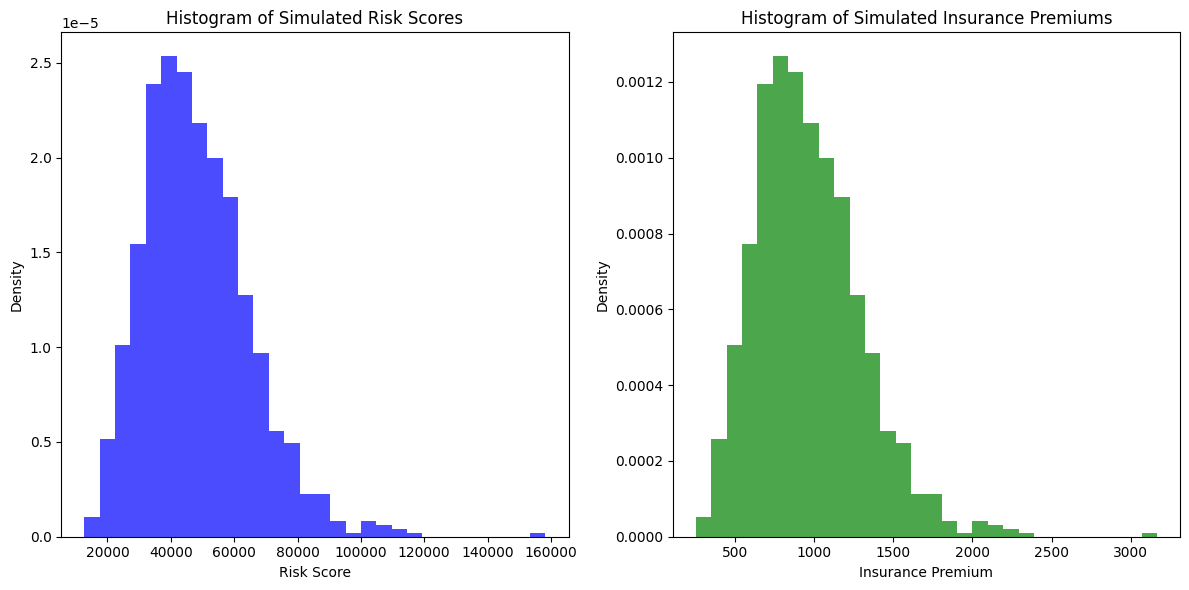

Mean Risk Score: 48224.04982193473
Mean Insurance Premium: $964.48


In [ ]:
import numpy as np
from scipy.stats import gumbel_r
import matplotlib.pyplot as plt

# Define risk factors for the assessment
risk_factors = {
    'data_breach': {'likelihood': 0.25, 'impact': 50000},
    'ransomware': {'likelihood': 0.15, 'impact': 100000},
    'phishing': {'likelihood': 0.30, 'impact': 20000},
}

# Gumbel distribution parameters (for likelihood and impact)
loc_likelihood, scale_likelihood = 0, 0.1  # Adjust scale as needed for variability
loc_impact, scale_impact = 50000, 10000    # Adjust scale for impact variability

# Number of Monte Carlo simulations
num_simulations = 1000

# Function to calculate risk score for each simulation
def calculate_risk_score_with_gumbel(risk_factors, num_simulations):
    risk_scores = []

    for _ in range(num_simulations):
        total_risk_score = 0

        for risk, values in risk_factors.items():
            # Simulate likelihood using Gumbel distribution
            simulated_likelihood = gumbel_r.rvs(loc=values['likelihood'], scale=scale_likelihood)
            simulated_likelihood = np.clip(simulated_likelihood, 0, 1)  # Limit likelihood between 0 and 1

            # Simulate impact using Gumbel distribution
            simulated_impact = gumbel_r.rvs(loc=values['impact'], scale=scale_impact)
            simulated_impact = max(0, simulated_impact)  # Ensure impact is non-negative

            # Calculate risk score for this factor
            risk_score = simulated_likelihood * simulated_impact
            total_risk_score += risk_score

        risk_scores.append(total_risk_score)

    return risk_scores

# Function to calculate insurance premium
def calculate_premium(base_rate, risk_scores):
    premiums = [base_rate * risk_score for risk_score in risk_scores]
    return premiums

# Base rate for insurance premium calculation
base_rate = 0.02  # 2% of the risk score

# Run Monte Carlo simulations
risk_scores = calculate_risk_score_with_gumbel(risk_factors, num_simulations)
premiums = calculate_premium(base_rate, risk_scores)

# Plot the results (histogram of risk scores and premiums)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(risk_scores, bins=30, color='blue', alpha=0.7, density=True)
plt.title('Histogram of Simulated Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(premiums, bins=30, color='green', alpha=0.7, density=True)
plt.title('Histogram of Simulated Insurance Premiums')
plt.xlabel('Insurance Premium')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Display summary statistics
mean_risk_score = np.mean(risk_scores)
mean_premium = np.mean(premiums)
print(f"Mean Risk Score: {mean_risk_score}")
print(f"Mean Insurance Premium: ${mean_premium:.2f}")


Model Accuracy (R²): -19.60%
       threat  vulnerability  predicted_risk_score       premium
521  0.807157      -0.158142          38216.406631  3.821741e+08
737  0.799518       1.115067          43506.575520  4.350758e+08
740  1.509671       0.542810          46020.365628  4.602137e+08
660  0.442695       1.406895          46941.848125  4.694285e+08
411  1.205737       0.107987          47822.955463  4.782396e+08


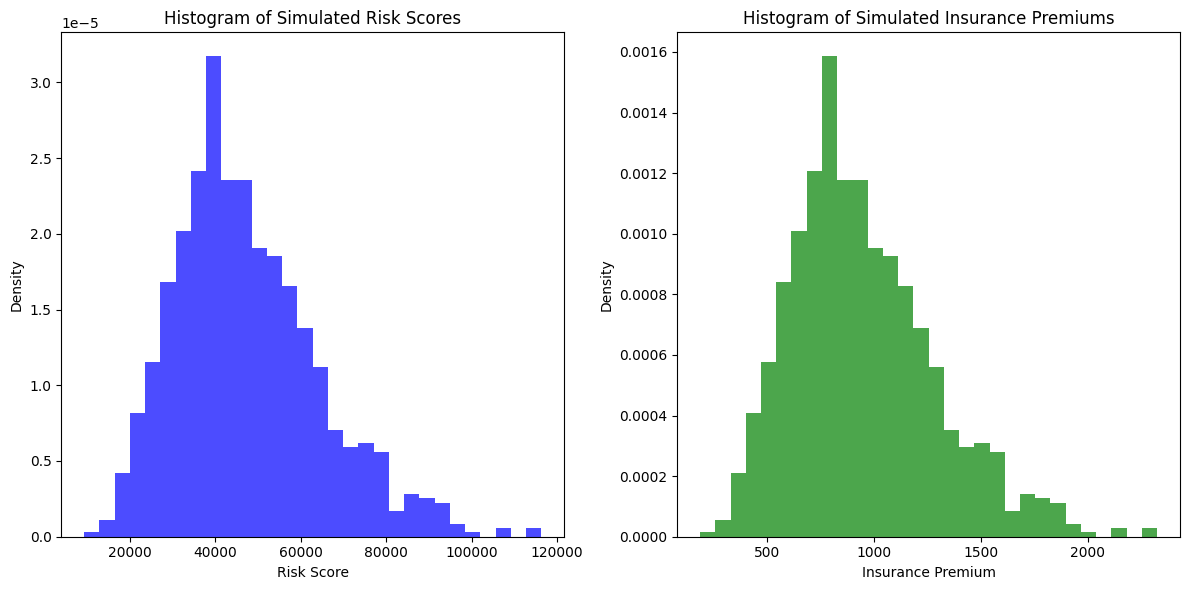

Claim Payout: $87875.00
Mean Risk Score: 47427.327111041035
Mean Insurance Premium: $948.55


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import gumbel_r, multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Define risk factors for the assessment
risk_factors = {
    'data_breach': {'likelihood': 0.25, 'impact': 50000},
    'ransomware': {'likelihood': 0.15, 'impact': 100000},
    'phishing': {'likelihood': 0.30, 'impact': 20000},
}

# Gumbel distribution parameters for likelihood and impact
loc_likelihood, scale_likelihood = 0, 0.1  # Adjust scale as needed for variability
loc_impact, scale_impact = 50000, 10000    # Adjust scale for impact variability

# Number of Monte Carlo simulations
num_simulations = 1000

# Function to calculate risk score using Gumbel distribution
def calculate_risk_score_with_gumbel(risk_factors, num_simulations):
    risk_scores = []

    for _ in range(num_simulations):
        total_risk_score = 0

        for risk, values in risk_factors.items():
            # Simulate likelihood using Gumbel distribution
            simulated_likelihood = gumbel_r.rvs(loc=values['likelihood'], scale=scale_likelihood)
            simulated_likelihood = np.clip(simulated_likelihood, 0, 1)  # Limit likelihood between 0 and 1

            # Simulate impact using Gumbel distribution
            simulated_impact = gumbel_r.rvs(loc=values['impact'], scale=scale_impact)
            simulated_impact = max(0, simulated_impact)  # Ensure impact is non-negative

            # Calculate risk score for this factor
            risk_score = simulated_likelihood * simulated_impact
            total_risk_score += risk_score

        risk_scores.append(total_risk_score)

    return risk_scores

# Function to calculate insurance premium
def calculate_premium(base_rate, risk_scores):
    premiums = [base_rate * risk_score for risk_score in risk_scores]
    return premiums

# Base rate for insurance premium calculation
base_rate = 0.02  # 2% of the risk score

# Step 1: Run Monte Carlo simulations for risk scores using Gumbel distribution
risk_scores = calculate_risk_score_with_gumbel(risk_factors, num_simulations)
premiums = calculate_premium(base_rate, risk_scores)

# Convert risk scores to a DataFrame for further analysis
data = pd.DataFrame({'risk_score': risk_scores})

# Step 2: Define features for machine learning (simulating threat and vulnerability)
# Define the correlation matrix (correlated variables for threat and vulnerability)
corr_matrix = [[1, 0.6], [0.6, 1]]  # Example: 0.6 correlation

# Mean values for threat and vulnerability
mean = [0.5, 0.7]  # Mean threat at 0.5 and vulnerability at 0.7

# Generate random samples for threat and vulnerability
simulated_data = multivariate_normal(mean=mean, cov=corr_matrix).rvs(num_simulations)

# Split into threat and vulnerability variables
data['threat'] = simulated_data[:, 0]
data['vulnerability'] = simulated_data[:, 1]

# Step 3: Machine Learning - Random Forest Regression for risk prediction
# Define features (threat, vulnerability) and target (risk score)
X = data[['threat', 'vulnerability']]
y = data['risk_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance (R² score)
accuracy = rf_model.score(X_test, y_test)
print(f"Model Accuracy (R²): {accuracy * 100:.2f}%")

# Step 4: Premium calculation based on predicted risk scores
def calculate_premium_from_model(predicted_risk_score):
    """Calculate insurance premium based on predicted risk score."""
    base_premium = 10000  # Base premium value
    return base_premium * (1 + predicted_risk_score)

# Calculate premiums for the test set based on predicted risk scores
data_test = X_test.copy()
data_test['predicted_risk_score'] = y_pred
data_test['premium'] = data_test['predicted_risk_score'].apply(calculate_premium_from_model)

# Display the first few rows of the test data with calculated premiums
print(data_test.head())

# Step 5: Visualize the results
plt.figure(figsize=(12, 6))

# Plot histograms of risk scores and premiums
plt.subplot(1, 2, 1)
plt.hist(data['risk_score'], bins=30, color='blue', alpha=0.7, density=True)
plt.title('Histogram of Simulated Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(premiums, bins=30, color='green', alpha=0.7, density=True)
plt.title('Histogram of Simulated Insurance Premiums')
plt.xlabel('Insurance Premium')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Step 6: Process a claim based on policy terms and risk score
def process_claim(claim_amount, policy_coverage, deductible, risk_score):
    """Calculate the payout based on claim amount, policy coverage, deductible, and risk score."""
    if claim_amount > policy_coverage:
        print("Claim exceeds policy coverage. Adjusting to maximum coverage.")
        claim_amount = policy_coverage

    payout = claim_amount - deductible
    payout *= (1 - risk_score * 0.1)  # Higher risk reduces payout

    return max(payout, 0)  # Ensure payout is non-negative

# Example claims processing
claim_amount = 100000  # Claim amount
policy_coverage = 150000  # Policy coverage
deductible = 5000  # Deductible
risk_score_example = 0.75  # Example risk score

# Process the claim
payout = process_claim(claim_amount, policy_coverage, deductible, risk_score_example)
print(f"Claim Payout: ${payout:.2f}")

# Summary statistics
mean_risk_score = np.mean(risk_scores)
mean_premium = np.mean(premiums)
print(f"Mean Risk Score: {mean_risk_score}")
print(f"Mean Insurance Premium: ${mean_premium:.2f}")
